In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Importing machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/My Drive/Maternal Risks/Maternal Health Risk Data Set.csv"

# Load dataset
df = pd.read_csv(dataset_path)

# Display first 5 rows
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
print(f"Total number of duplicates: {df.duplicated().sum()}")
df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

Total number of duplicates: 562


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


<ipython-input-6-bb0eb39a9b8a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=p_colors)


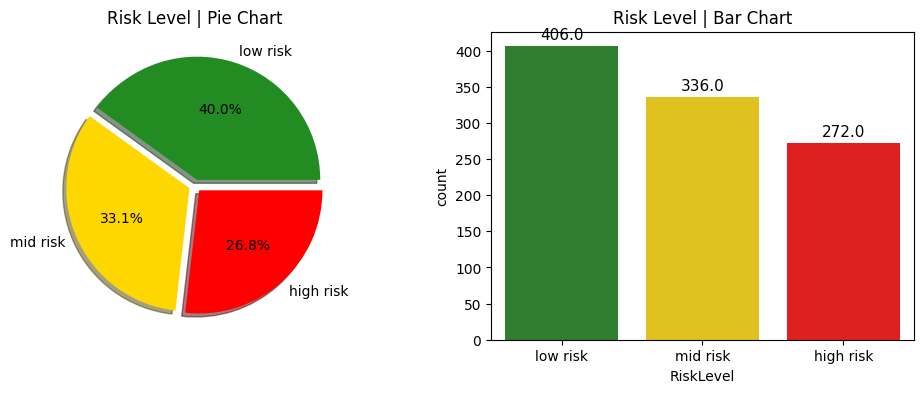

In [ ]:
p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level | Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=11, xytext=(0, 8), textcoords='offset points')

ax[1].set_title("Risk Level | Bar Chart")
plt.show()


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [ ]:
# Function to plot histograms and boxplots
def num_plot(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data=df, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")
    plt.show()

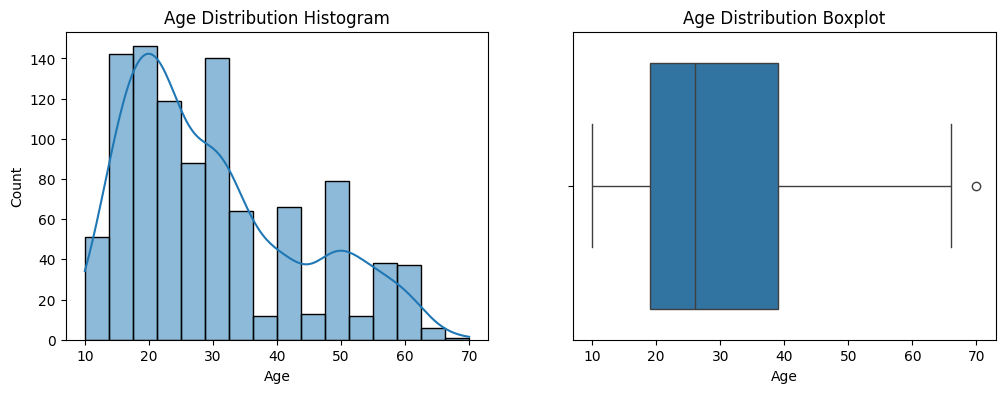

In [ ]:
num_plot(df, "Age")

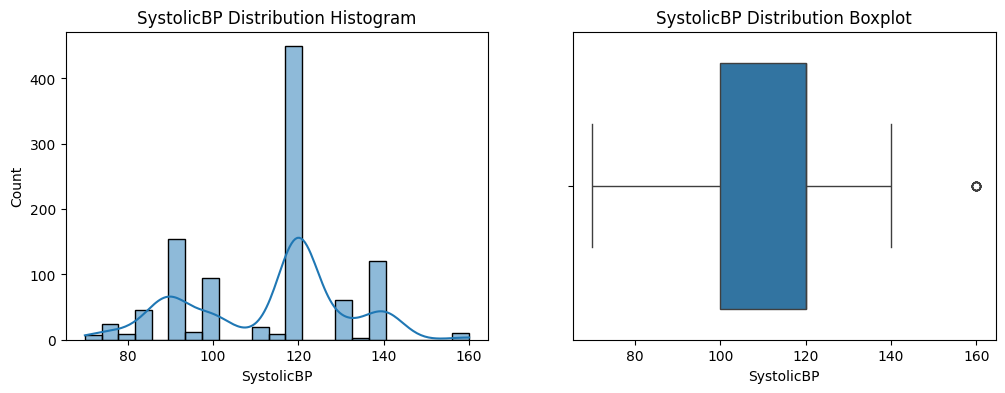

In [ ]:
num_plot(df, "SystolicBP")

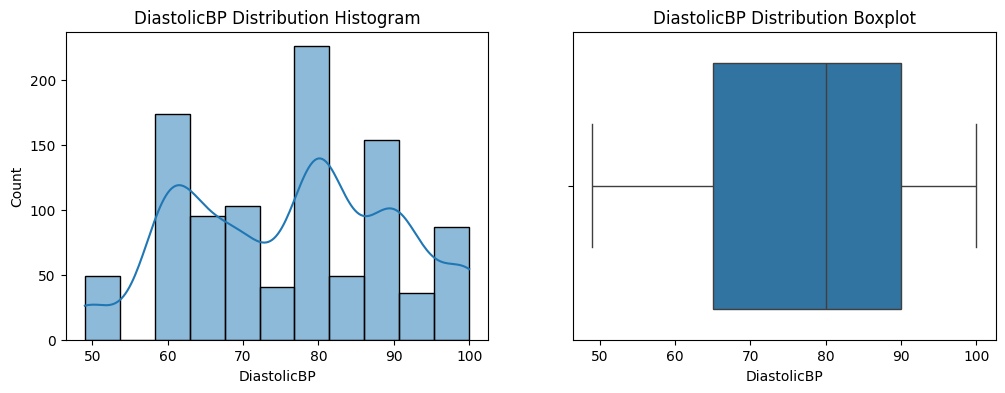

In [ ]:
num_plot(df, "DiastolicBP")

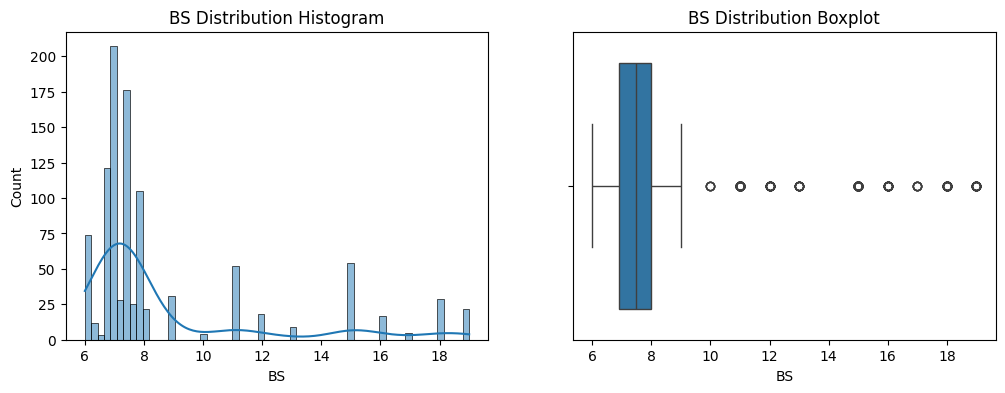

In [ ]:
num_plot(df, "BS")

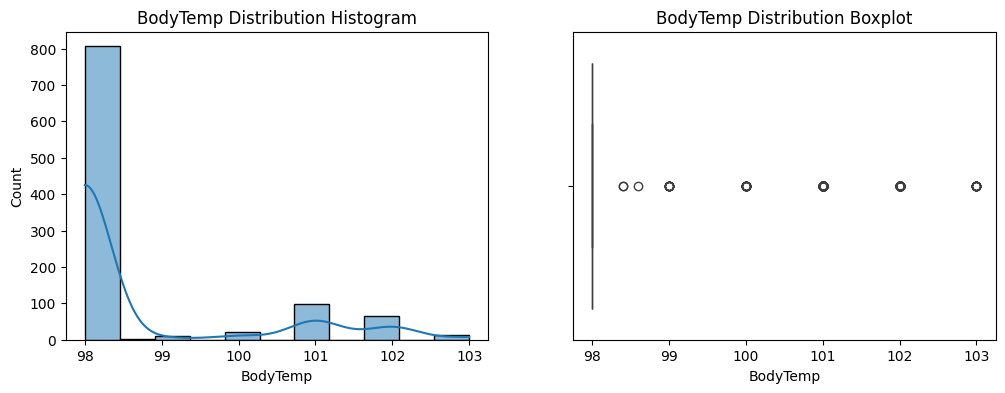

In [ ]:
num_plot(df, "BodyTemp")

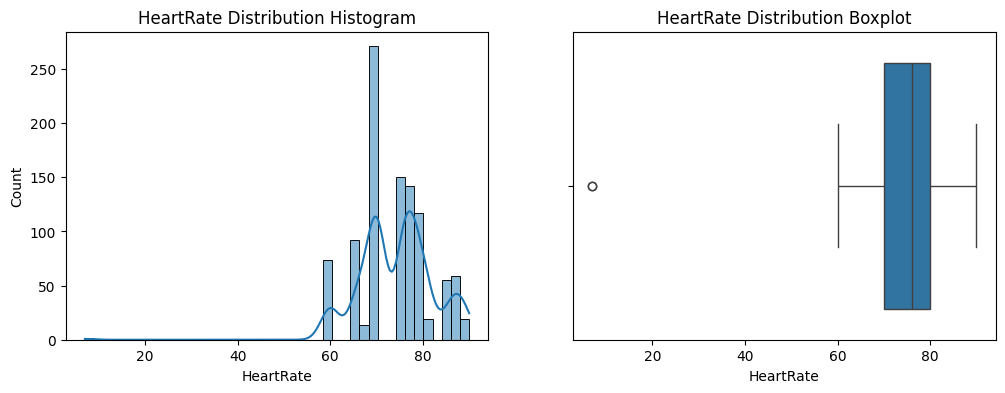

In [ ]:
num_plot(df, "HeartRate")

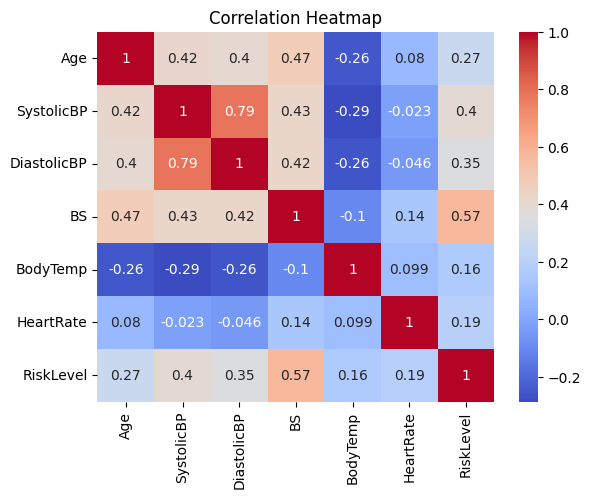

In [ ]:
# Convert RiskLevel to numeric values
df['RiskLevel'] = df['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})

# heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


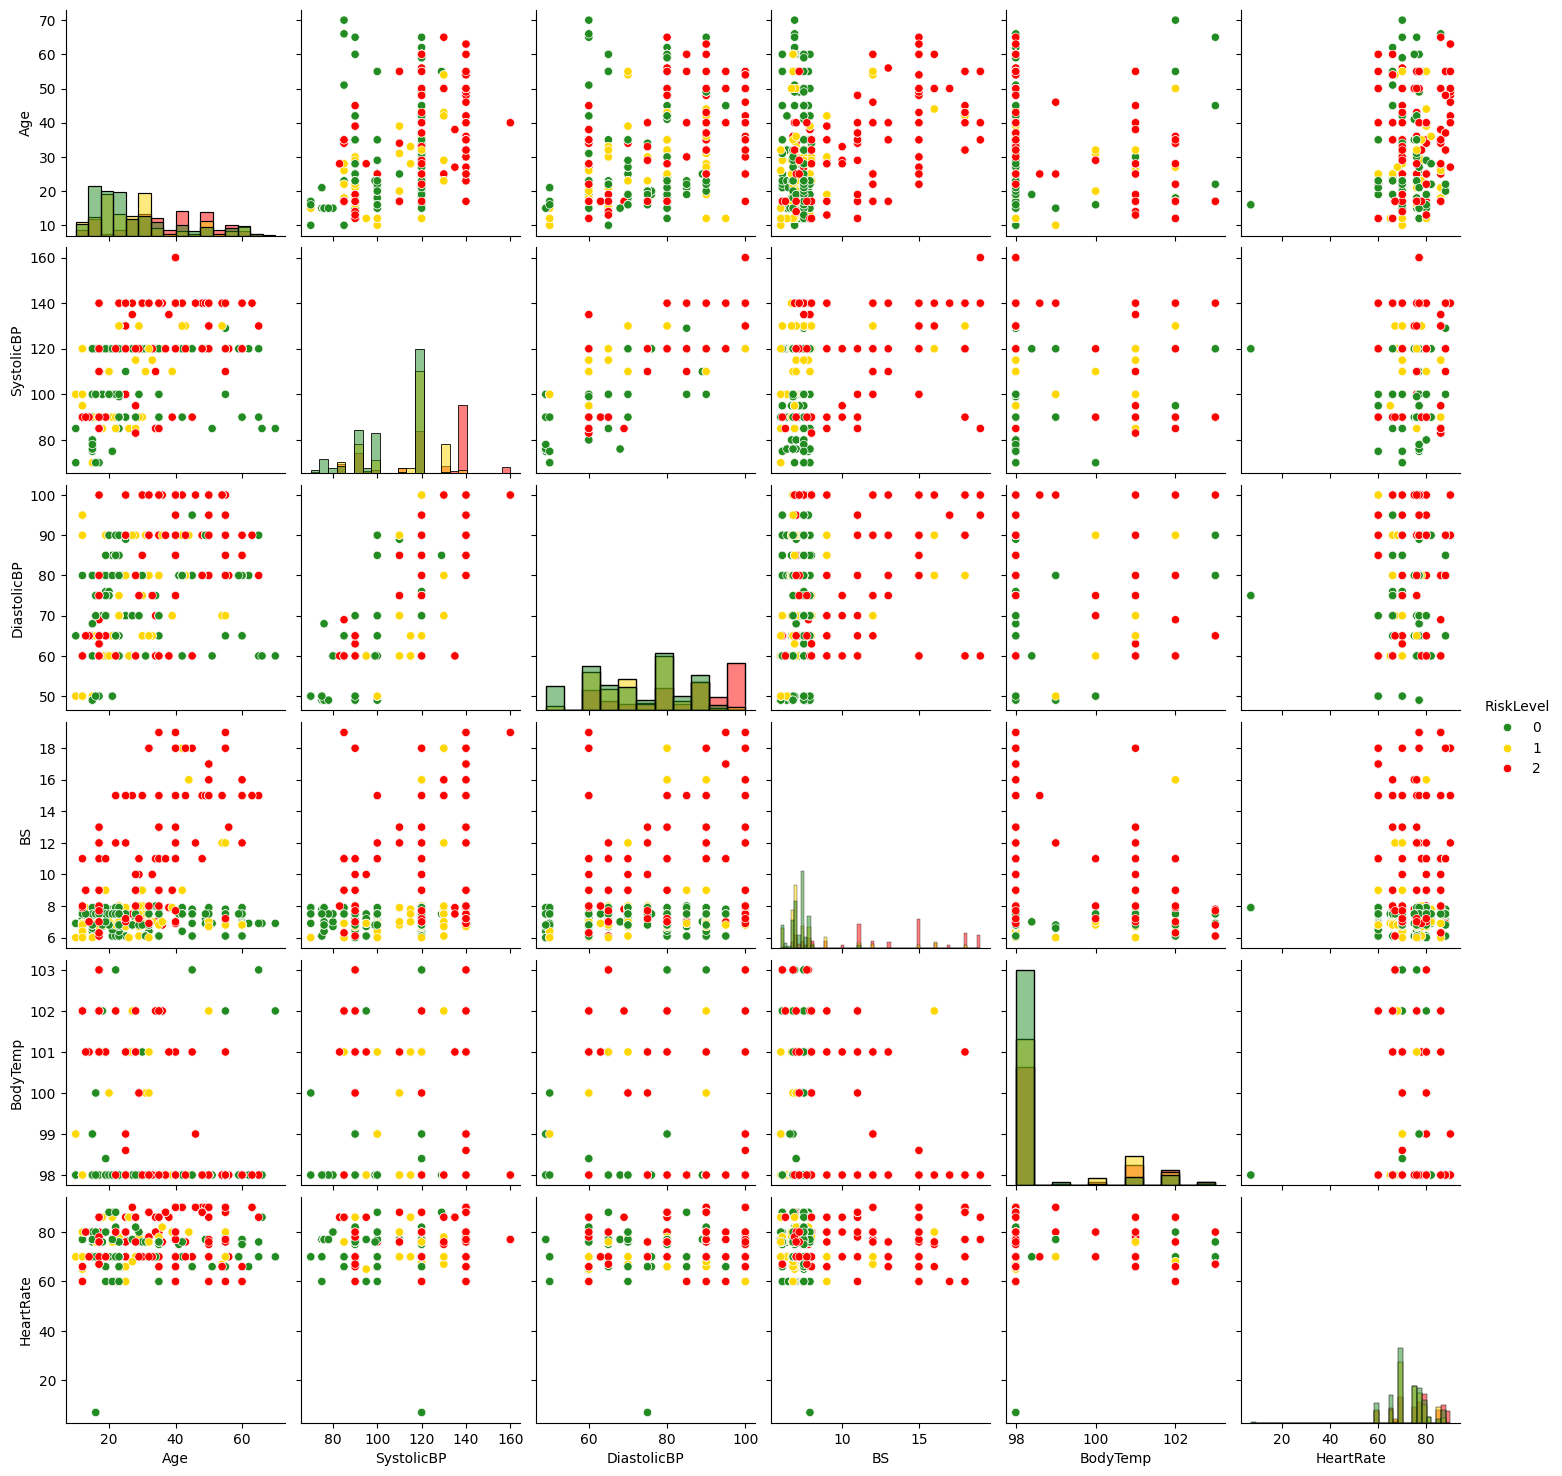

In [ ]:
sns.pairplot(df, hue="RiskLevel", palette=p_colors, diag_kind="hist")
plt.show()

In [ ]:
df["RiskLevel"] = df["RiskLevel"].replace({
    0: "low risk",
    1: "mid risk",
    2: "high risk"
})
p_colors = {"low risk": "green", "mid risk": "orange", "high risk": "red"}
risk_order = ["low risk", "mid risk", "high risk"]

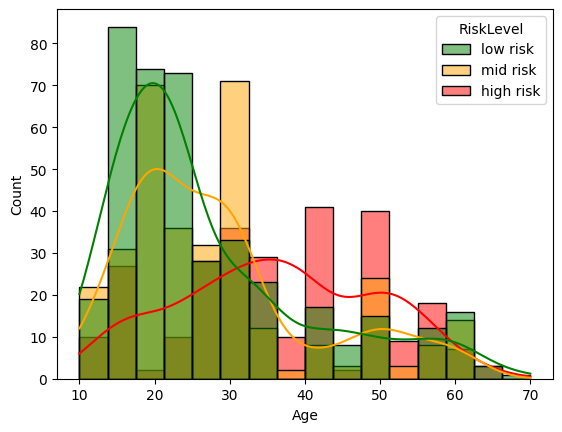

In [ ]:
sns.histplot(data=df, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [ ]:
pd.crosstab(df.RiskLevel, df.Age).style.background_gradient(cmap='summer_r')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


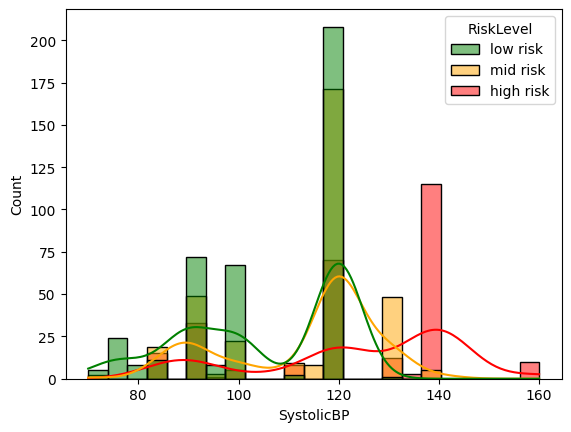

In [ ]:
sns.histplot(data=df, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [ ]:
pd.crosstab(df.RiskLevel, df.SystolicBP).style.background_gradient(cmap='summer_r')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
high risk,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
low risk,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
mid risk,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


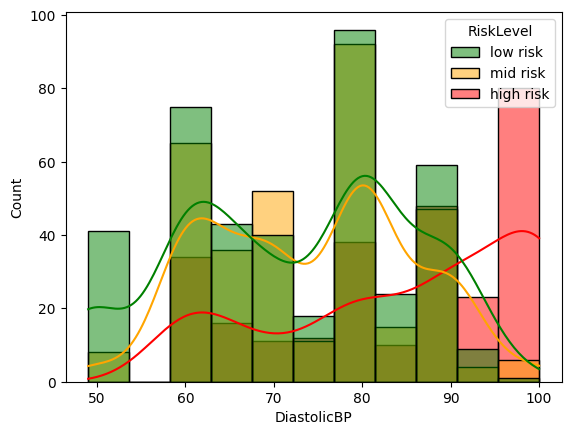

In [ ]:
sns.histplot(data=df, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [ ]:
pd.crosstab(df.RiskLevel, df.DiastolicBP).style.background_gradient(cmap='summer_r')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
low risk,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
mid risk,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


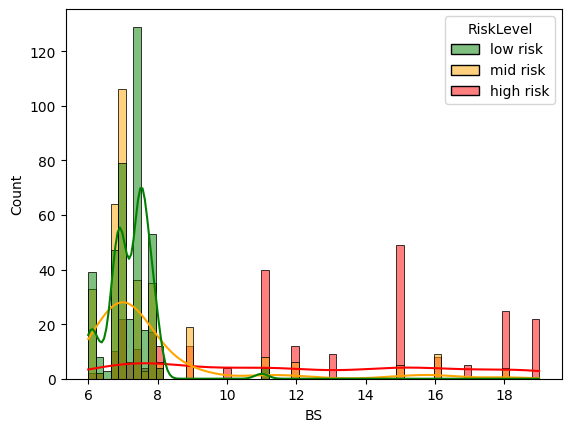

In [ ]:
sns.histplot(data=df, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [ ]:
pd.crosstab(df.RiskLevel, df.BS).style.background_gradient(cmap='summer_r')

BS,6.000000,6.100000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.010000,7.100000,7.200000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,15.000000,16.000000,17.000000,18.000000,19.000000
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,2,2,0,0,0,0,10,8,9,5,0,6,11,0,4,5,12,12,12,4,40,12,9,49,8,5,25,22
low risk,7,32,0,8,1,2,10,37,47,29,3,8,14,129,1,17,19,34,4,0,0,4,0,0,0,0,0,0,0
mid risk,14,19,0,2,0,0,23,41,58,41,7,0,0,36,0,3,21,14,6,19,0,8,6,0,5,9,0,4,0


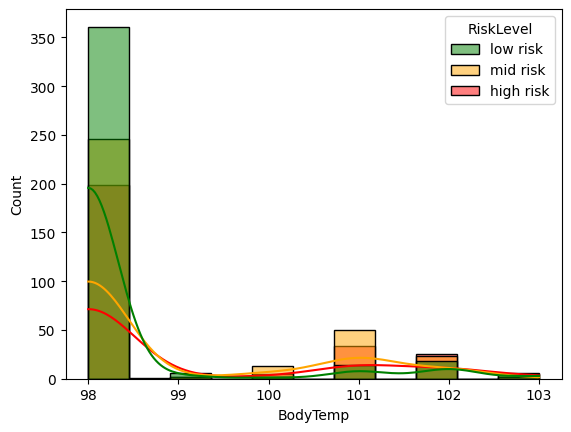

In [ ]:
sns.histplot(data=df, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [ ]:
pd.crosstab(df.RiskLevel, df.BodyTemp).style.background_gradient(cmap='summer_r')

BodyTemp,98.000000,98.400000,98.600000,99.000000,100.000000,101.000000,102.000000,103.000000
RiskLevel,,,,,,,,
high risk,199,0,1,2,5,34,25,6
low risk,359,2,0,6,2,14,18,5
mid risk,246,0,0,2,13,50,23,2


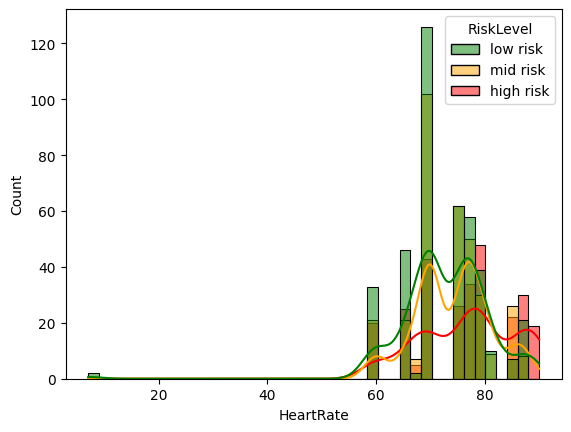

In [ ]:
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [ ]:
pd.crosstab(df.RiskLevel, df.HeartRate).style.background_gradient(cmap='summer_r')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
low risk,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
mid risk,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


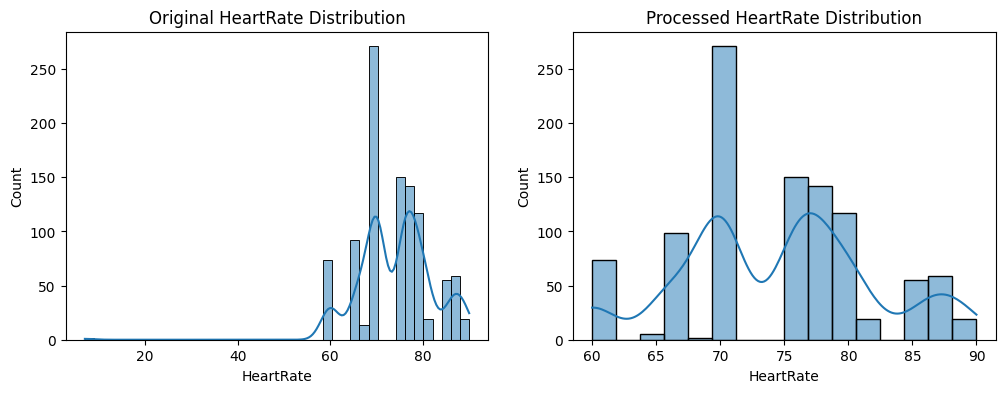

In [ ]:
data_proc = df.drop(df.index[df.HeartRate == 7])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=df, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data_proc, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Original HeartRate Distribution")
ax[1].set_title("Processed HeartRate Distribution")
plt.show()

In [ ]:
data_proc = data_proc.drop(["HeartRate"], axis=1)

In [ ]:
# Original Dataset
X = df.drop("RiskLevel", axis=1)
y = df["RiskLevel"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Processed Dataset
X_proc = data_proc.drop("RiskLevel", axis=1)
y_proc = data_proc["RiskLevel"]
x_train_proc, x_test_proc, y_train_proc, y_test_proc = train_test_split(X_proc, y_proc, test_size=0.2, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
print(f"Processed data has {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")


Original data has 760 train data and 254 test data

Processed data has 809 train data and 203 test data


In [ ]:
# Using original dataset
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Original Dataset Accuracy: {accuracy_score(y_test, y_pred)}")

# Using processed dataset
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_proc, y_train_proc)
y_pred_proc = rf2.predict(x_test_proc)  # Change variable name to avoid confusion
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred_proc)}")

Original Dataset Accuracy: 0.8582677165354331
Processed Dataset Accuracy: 0.8916256157635468


In [ ]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "criterion": ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(x_train_proc, y_train_proc)
print("Best hyperparameter:", grid.best_params_)

Best hyperparameter: {'criterion': 'gini', 'n_estimators': 50}


In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
2,"{'criterion': 'gini', 'n_estimators': 50}",0.831867,1
3,"{'criterion': 'gini', 'n_estimators': 100}",0.830648,2
7,"{'criterion': 'entropy', 'n_estimators': 100}",0.828179,3
6,"{'criterion': 'entropy', 'n_estimators': 50}",0.828164,4
1,"{'criterion': 'gini', 'n_estimators': 20}",0.823241,5
5,"{'criterion': 'entropy', 'n_estimators': 20}",0.822006,6
4,"{'criterion': 'entropy', 'n_estimators': 10}",0.818210,7
0,"{'criterion': 'gini', 'n_estimators': 10}",0.808302,8


In [ ]:
y_pred = grid.predict(x_test_proc)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred)}")

Processed Dataset Accuracy: 0.9014778325123153


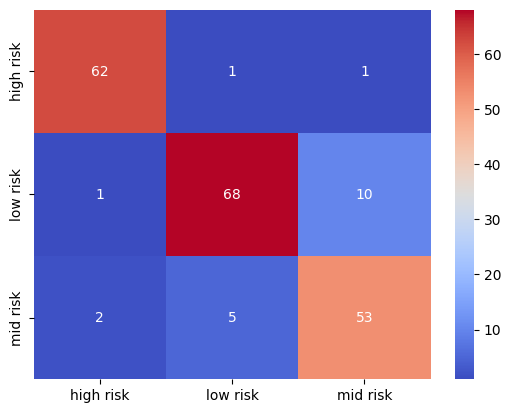

In [ ]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test_proc, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Separate features and target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Convert categorical columns in X to numeric (One-Hot Encoding)
X = pd.get_dummies(X)

# Convert categorical target variable y to numeric (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Model (RBF Kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Predictions
svm_preds = svm_model.predict(X_test_scaled)

# Evaluation
print("SVM (RBF) Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


SVM (RBF) Accuracy: 0.6798029556650246
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        47
           1       0.61      0.88      0.72        80
           2       0.74      0.37      0.49        76

    accuracy                           0.68       203
   macro avg       0.72      0.70      0.68       203
weighted avg       0.70      0.68      0.66       203



In [ ]:
from xgboost import XGBClassifier

# Separate features and target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Convert categorical columns in X to numeric (One-Hot Encoding)
X = pd.get_dummies(X)

# Convert categorical target variable y to numeric (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))


XGBoost Accuracy: 0.7339901477832512
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        47
           1       0.70      0.78      0.73        80
           2       0.70      0.64      0.67        76

    accuracy                           0.73       203
   macro avg       0.75      0.74      0.75       203
weighted avg       0.74      0.73      0.73       203



In [ ]:
from sklearn.tree import DecisionTreeClassifier


# Separate features and target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Convert categorical columns in X to numeric (One-Hot Encoding)
X = pd.get_dummies(X)

# Convert categorical target variable y to numeric (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to normalize features (not mandatory for Decision Tree, but keeps consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
dt_preds = dt_model.predict(X_test_scaled)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))


Decision Tree Accuracy: 0.6847290640394089
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        47
           1       0.61      0.95      0.74        80
           2       0.76      0.34      0.47        76

    accuracy                           0.68       203
   macro avg       0.74      0.69      0.68       203
weighted avg       0.72      0.68      0.66       203



In [ ]:
from sklearn.naive_bayes import GaussianNB


# Separate features and target
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Convert categorical columns in X to numeric (One-Hot Encoding)
X = pd.get_dummies(X)

# Convert categorical target variable y to numeric (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to normalize features (Naïve Bayes doesn't require it, but it helps for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naïve Bayes Model
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)

# Predictions
gnb_preds = gnb_model.predict(X_test_scaled)

# Evaluation
print("Gaussian Naïve Bayes Accuracy:", accuracy_score(y_test, gnb_preds))
print(classification_report(y_test, gnb_preds))


Gaussian Naïve Bayes Accuracy: 0.5763546798029556
              precision    recall  f1-score   support

           0       0.79      0.64      0.71        47
           1       0.52      0.91      0.66        80
           2       0.56      0.18      0.28        76

    accuracy                           0.58       203
   macro avg       0.62      0.58      0.55       203
weighted avg       0.60      0.58      0.53       203



In [ ]:
model_names = ["SVM (RBF)", "XGBoost", "Decision Tree", "Gaussian Naïve Bayes"]
accuracies = [
    accuracy_score(y_test, svm_preds),
    accuracy_score(y_test, xgb_preds),
    accuracy_score(y_test, dt_preds),
    accuracy_score(y_test, gnb_preds)
]

# Random Forest used processed data
model_names.append("Random Forest")
accuracies.append(accuracy_score(y_test_proc, y_pred_proc))  # Use processed y_test


<ipython-input-20-7f064b1b2122>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


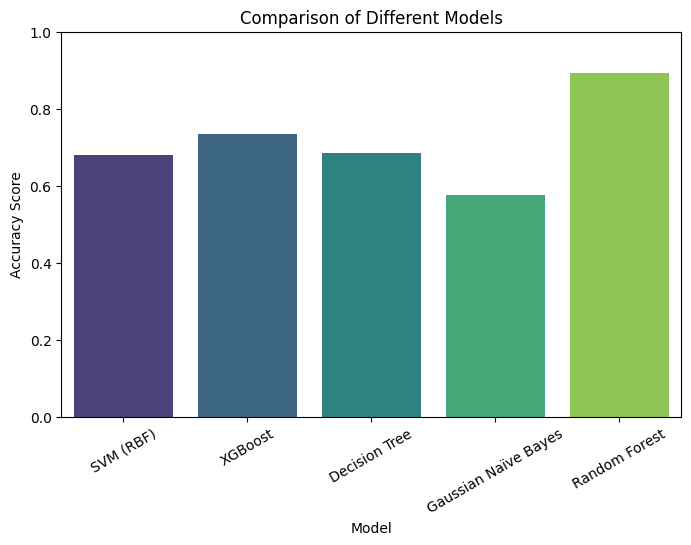

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Different Models")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()


In [ ]:
import pandas as pd

def detect_outliers(df):
    # Store outlier information
    outliers = []

    # Selecting only numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    for col in numerical_cols:
        # Calculate IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Define lower and upper bounds
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)

        # Count outliers
        num_outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)].shape[0]
        percentage_outliers = (num_outliers / df.shape[0]) * 100 if df.shape[0] > 0 else 0

        # Store results
        outliers.append({"Feature": col, "Number of Outliers": num_outliers, "Percentage of Outliers": percentage_outliers})

    # Convert to DataFrame
    outliers_df = pd.DataFrame(outliers)

    # Print summary
    total_outliers = outliers_df["Number of Outliers"].sum()
    total_percentage = (total_outliers / df.shape[0]) * 100 if df.shape[0] > 0 else 0

    print(f"Total number of outliers: {total_outliers}")
    print(f"Percentage of total data that are outliers: {total_percentage:.3f}%")

    return outliers_df

# Example usage
outlier_summary = detect_outliers(df)
print(outlier_summary)


Total number of outliers: 433
Percentage of total data that are outliers: 42.702%
       Feature  Number of Outliers  Percentage of Outliers
0          Age                   1                0.098619
1   SystolicBP                  10                0.986193
2  DiastolicBP                   0                0.000000
3           BS                 210               20.710059
4     BodyTemp                 210               20.710059
5    HeartRate                   2                0.197239
